#### A decision tree is a non-parametric supervised learning algorithm used for both classification and regression tasks. It has a hierarchical, tree-like structure comprising the following components:
#### Root node: The initial node with no incoming branches.
#### Internal nodes (decision nodes): These nodes evaluate features to form homogenous subsets.
#### Leaf nodes (terminal nodes): Represent possible outcomes within the dataset.
## CART algo:
#### to build a tree we make use of CART which stands for Classification and Regression Tree Algorithm

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# for scalling the data
from sklearn.preprocessing import StandardScaler

In [3]:
# load the dataset
d_set=pd.read_csv("Social_Network_Ads.csv")
d_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

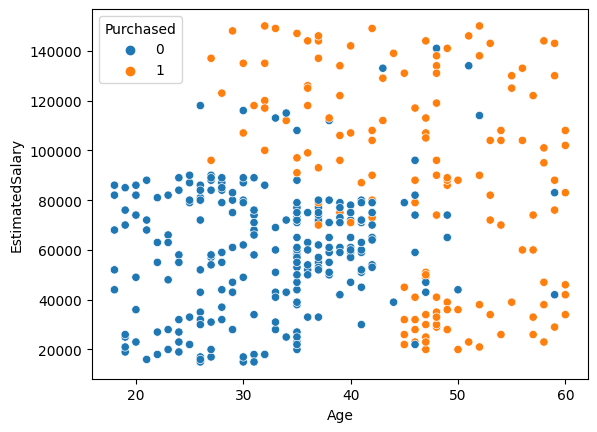

In [4]:
# graphical representation
sns.scatterplot(x=d_set['Age'], y=d_set['EstimatedSalary'], data=d_set, hue=d_set['Purchased'])

### result: since from the above graph it is clear that the data is not linearly separable and hence we can apply decesion tree

In [6]:
# separate the input and output data
x=d_set[['Age', 'EstimatedSalary']]
y=d_set['Purchased']

### Since the values in the Age column are way too smaller than the estimatedSalary column, hence we need to scale the data

In [21]:
# scalling the input data
sc=StandardScaler()

# fitf the input data
sc.fit(x)

# transform and make dataframe of it
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [9]:
# split the data
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)

In [10]:
# now model
dt=DecisionTreeClassifier()
# we can also define criteria for classifier such as  ( criterion='entropy)

# fit the data
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [12]:
# score
dt.score(xtest, ytest)*100

85.0

In [17]:
d_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
# predict the sample data from the dataset as --> 36	33000	0
dt.predict([[36	,33000	]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### result: the model has predicted the wrong output despite haiving 85% accuracy score

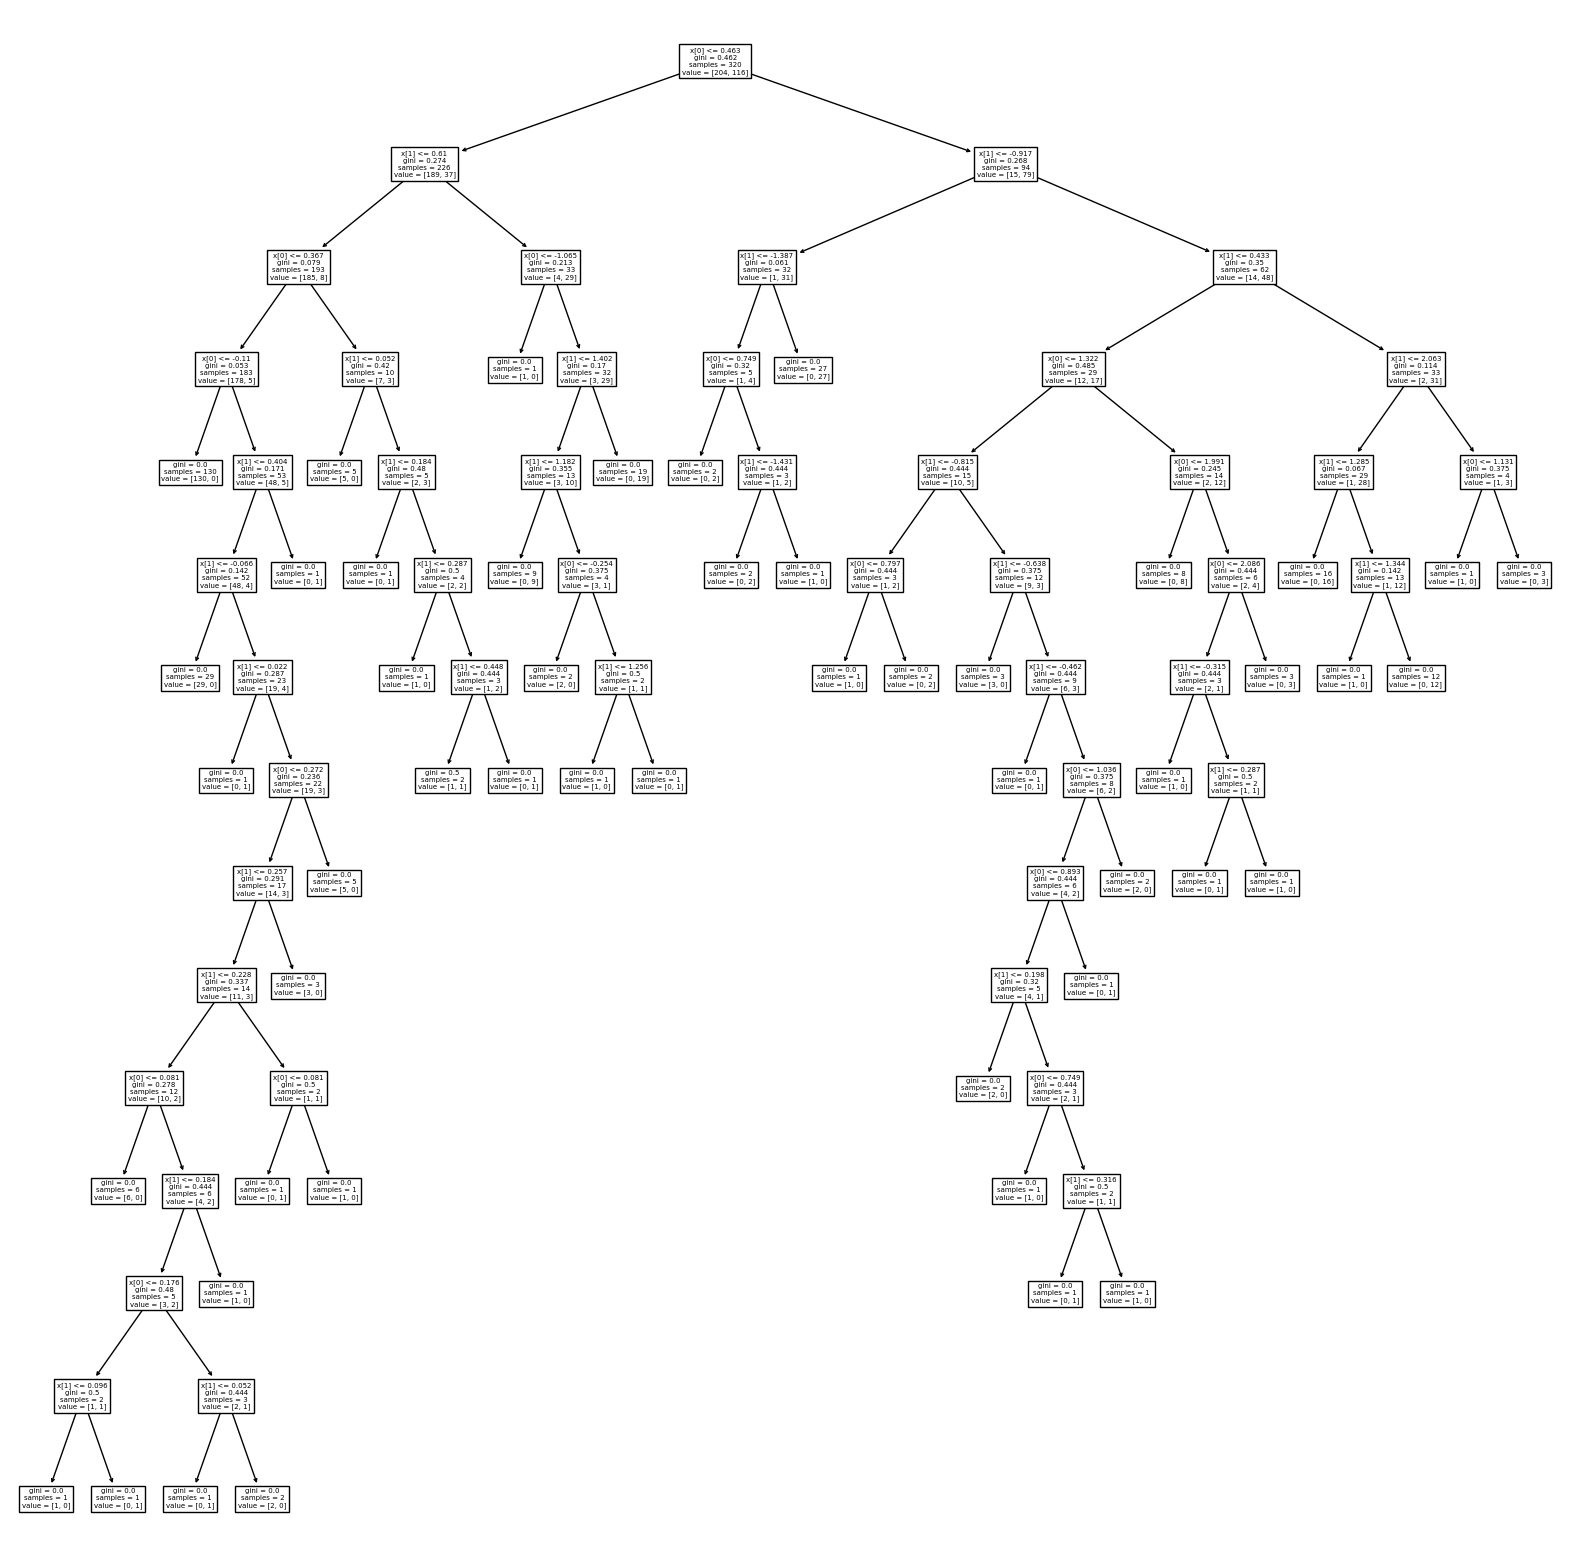

In [16]:
# now to plot tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt)

# to save image
plt.savefig("demo_tree.jpg")
plt.show()

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot: >

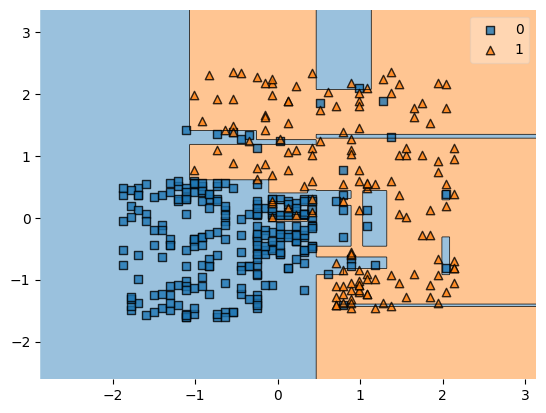

In [18]:
# ploting the decision boundry
from mlxtend.plotting import plot_decision_regions

# plot
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)

In [22]:
# check training and testing accuracy to check the overfitting or underfitting problems
print("The training accuracy score is-->", dt.score(xtrain, ytrain)*100)

print("The testing accuracy score is-->", dt.score(xtest, ytest)*100)

The training accuracy score is--> 99.6875
The testing accuracy score is--> 85.0


### result: since the accuracy of training data is very high as compared to that of testing data. therefore, there is an overfitting problem.
### we need to solve the overfitting problem in order to attain the max performance using prinning method in the following manner 

In [44]:
# to decide the max_depth
for i in range(1, 20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain, ytrain)
    # now to print the accuracy values and decide based on those values
    print("iteration ",i,"training score--> ", dt2.score(xtrain, ytrain), " and testing score--> ", dt2.score(xtest, ytest))

iteration  1 training score-->  0.8375  and testing score-->  0.85
iteration  2 training score-->  0.915625  and testing score-->  0.9125
iteration  3 training score-->  0.91875  and testing score-->  0.9125
iteration  4 training score-->  0.9375  and testing score-->  0.85
iteration  5 training score-->  0.95625  and testing score-->  0.85
iteration  6 training score-->  0.96875  and testing score-->  0.8375
iteration  7 training score-->  0.978125  and testing score-->  0.8625
iteration  8 training score-->  0.98125  and testing score-->  0.8375
iteration  9 training score-->  0.98125  and testing score-->  0.85
iteration  10 training score-->  0.984375  and testing score-->  0.875
iteration  11 training score-->  0.9875  and testing score-->  0.875
iteration  12 training score-->  0.9875  and testing score-->  0.875
iteration  13 training score-->  0.990625  and testing score-->  0.85
iteration  14 training score-->  0.996875  and testing score-->  0.85
iteration  15 training score-

### result: from above output values at i=3 or 4 it produces almost the same taining and testing scores, hence the max_depth = 3 is the bset choice

In [45]:
dt1=DecisionTreeClassifier(max_depth=3) # means how deep would you like to work

# fit the data
dt1.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [46]:
# scores
print("The training accuracy score is-->", dt1.score(xtrain, ytrain)*100)

print("The testing accuracy score is-->", dt1.score(xtest, ytest)*100)

The training accuracy score is--> 91.875
The testing accuracy score is--> 91.25


### result: now we have overcome the overfitting problem

In [47]:
d_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [48]:
# predict the sample data from the dataset as --> 49	33000	1
dt1.predict([[49,36000]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### result: now the model also predicts the right answer

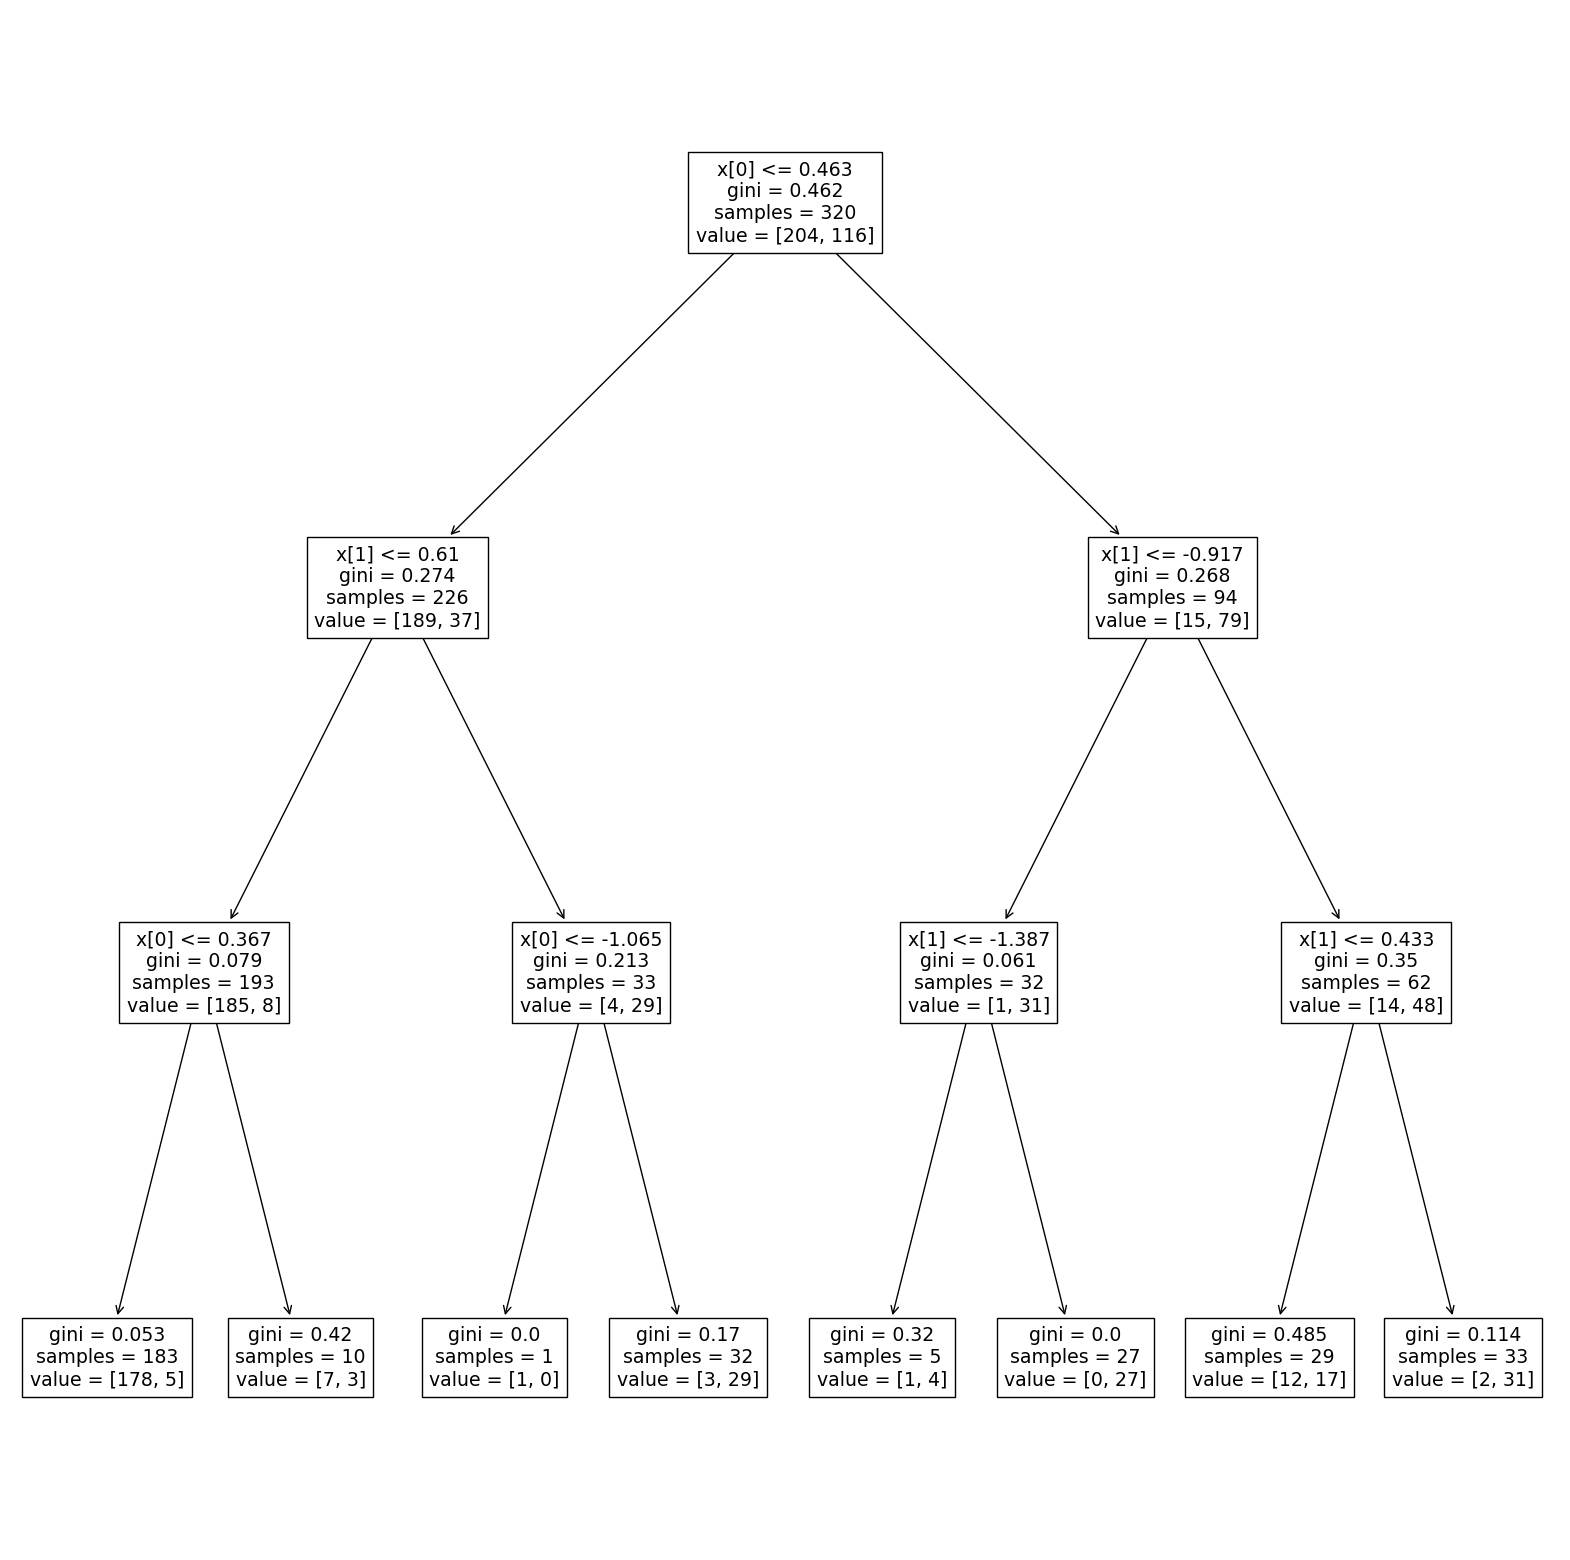

In [39]:
# plot the tree
plt.figure(figsize=(20,20))
plot_tree(dt1)
plt.savefig("after_pruning_tree.jpg")
plt.show()

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot: >

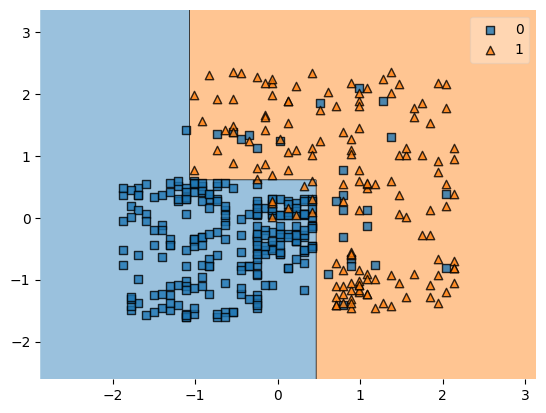

In [49]:
# again plot the decision boundry
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt1)

### result: from the above graph it is clear that now the model is trained very well